<a href="https://colab.research.google.com/github/hedayet13/learning-tensorflow/blob/main/MultiClass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-07-17 07:50:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   254MB/s    in 1.9s    

2021-07-17 07:50:06 (254 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os 
for dirpath , dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(len(dirnames))
  print(len(filenames))
  print(len(dirpath))

2
0
24
10
0
29
0
250
39
0
250
44
0
250
35
0
250
43
0
250
35
0
250
39
0
250
40
0
250
43
0
250
35
0
250
35
10
0
30
0
750
40
0
750
45
0
750
36
0
750
44
0
750
36
0
750
40
0
750
41
0
750
44
0
750
36
0
750
36


In [6]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jul 17 07:50 .
drwxr-xr-x  1 root root 4096 Jul 17 07:50 ..
drwxr-xr-x 12 root root 4096 Jul 17 07:50 test
drwxr-xr-x 12 root root 4096 Jul 17 07:50 train


In [7]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [9]:

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [10]:
import random
import matplotlib.image as mpimg

In [11]:
def view_random_image(target_dir ,target_class):
   target_folder = target_dir + target_class
  #  print(target_folder)
   random_image = random.sample(os.listdir(target_folder),1)
   print(random_image)
   img = mpimg.imread(target_folder+"/"+random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"image Shape:{img.shape}")
   return img

['1861148.jpg']
image Shape:(512, 512, 3)


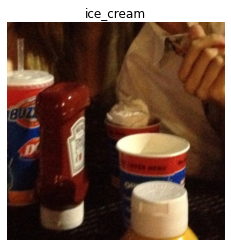

In [12]:
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names))

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =(224,224),
                                             batch_size = 32,
                                             class_mode ="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [16]:
model_8 = Sequential(
    [
     Conv2D(10,3,activation='relu',input_shape =(224,224,3)),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Conv2D(10,3,activation='relu'),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(10,activation="softmax")
    ]
)

model_8.compile(
    loss="categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 77s 192ms/step - loss: 2.1502 - accuracy: 0.2063 - val_loss: 2.1086 - val_accuracy: 0.2320
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9316 - accuracy: 0.3297 - val_loss: 1.8865 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.5770 - accuracy: 0.4687 - val_loss: 1.9040 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 1.0235 - accuracy: 0.6615 - val_loss: 2.2115 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.4354 - accuracy: 0.8672 - val_loss: 3.2553 - val_accuracy: 0.2920


In [17]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 3.2553 - accuracy: 0.2920


[3.2552664279937744, 0.2919999957084656]

In [37]:
def plot_loss_curves(history):
  loss= history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label = "trainning loss")
  plt.plot(epochs,val_loss, label ="val_loss")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label = "accuracy")
  plt.plot(epochs,val_accuracy, label ="val_accuracy")
  plt.legend()

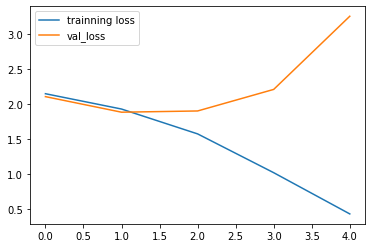

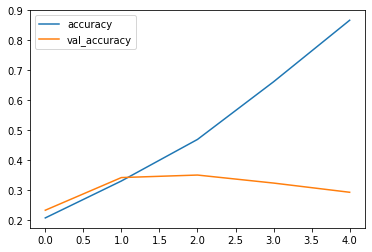

In [38]:
plot_loss_curves(history_8)

In [20]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [23]:
#overfiting issue solving 

model_9 = Sequential(
    [
     Conv2D(10,3,activation='relu',input_shape =(224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(10,activation="softmax")
    ]
)

model_9.compile(
    loss= "categorical_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
)

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch  =len(train_data),
                        validation_data = test_data ,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.2349 - accuracy: 0.2036 - val_loss: 2.0834 - val_accuracy: 0.2324
Epoch 2/5
235/235 [==============================] - 41s 176ms/step - loss: 1.8979 - accuracy: 0.3447 - val_loss: 2.0516 - val_accuracy: 0.2684
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.5543 - accuracy: 0.4799 - val_loss: 2.0872 - val_accuracy: 0.2732
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 1.1239 - accuracy: 0.6336 - val_loss: 2.4145 - val_accuracy: 0.2808
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.6552 - accuracy: 0.8024 - val_loss: 2.9182 - val_accuracy: 0.2564


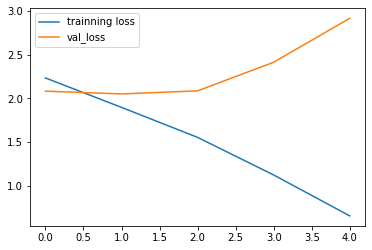

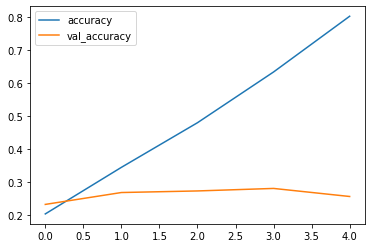

In [39]:
plot_loss_curves(history_9)

In [25]:
#reduce overfitting using data augmentation

In [26]:
train_datagen_augmented  = ImageDataGenerator(rescale=1/255.,
                                              rotation_range = 0.2,
                                              width_shift_range  =0.2,
                                              height_shift_range =0.2,
                                              horizontal_flip =True)
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                  target_size = (224,224),
                                                  batch_size =32,
                                                  class_mode ="categorical")

Found 7500 images belonging to 10 classes.


In [30]:
model_10 =  tf.keras.models.clone_model(model_8)

model_10.compile(
    loss ="categorical_crossentropy",
    optimizer = Adam(),
    metrics  = ["accuracy"]
)


In [31]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [32]:
history_10 = model_10.fit(train_datagen_augmented,
                          epochs =10 ,
                          steps_per_epoch  = len(train_datagen_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 111s 471ms/step - loss: 2.2783 - accuracy: 0.1224 - val_loss: 2.1272 - val_accuracy: 0.2464
Epoch 2/10
235/235 [==============================] - 111s 473ms/step - loss: 2.1124 - accuracy: 0.2360 - val_loss: 1.9870 - val_accuracy: 0.2984
Epoch 3/10
235/235 [==============================] - 109s 464ms/step - loss: 2.0468 - accuracy: 0.2768 - val_loss: 1.9107 - val_accuracy: 0.3224
Epoch 4/10
235/235 [==============================] - 112s 475ms/step - loss: 1.9790 - accuracy: 0.3063 - val_loss: 1.8093 - val_accuracy: 0.3856
Epoch 5/10
235/235 [==============================] - 109s 465ms/step - loss: 1.9218 - accuracy: 0.3343 - val_loss: 1.7124 - val_accuracy: 0.4180
Epoch 6/10
235/235 [==============================] - 111s 470ms/step - loss: 1.8810 - accuracy: 0.3481 - val_loss: 1.7339 - val_accuracy: 0.4084
Epoch 7/10
235/235 [==============================] - 109s 466ms/step - loss: 1.8423 - accuracy: 0.3631 - val_loss: 1.6773 -

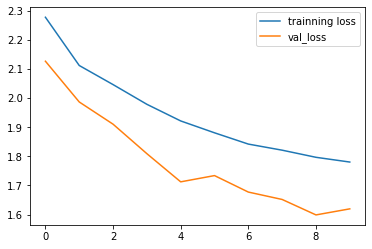

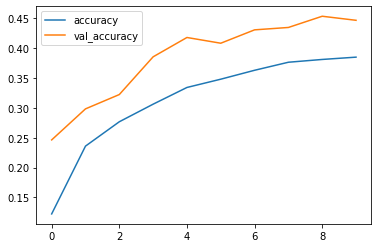

In [40]:
plot_loss_curves(history_10)

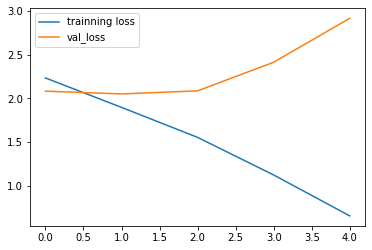

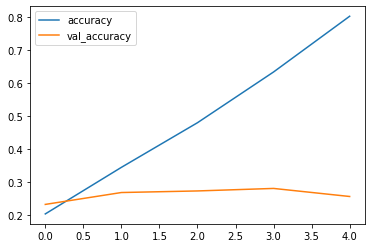

In [41]:
plot_loss_curves(history_9)

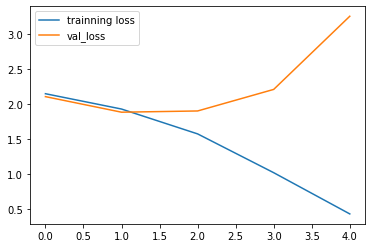

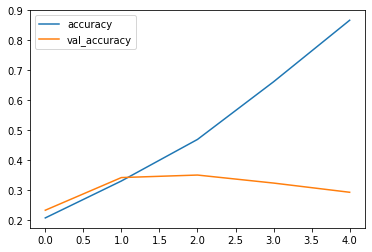

In [42]:
plot_loss_curves(history_8)

In [49]:
def load_and_prep_image(filename,image_shape=224):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(img,channels=3)
  img= tf.image.resize(img,size =[image_shape,image_shape])

  img = img/255.
  return img

def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred)]
  else:
    pred_class =class_names[int(tf.round(pred))]

  # pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

In [50]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [51]:
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-07-17 08:58:48--  https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.2’

03-hamburger.jpeg.2 100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2021-07-17 08:58:48 (49.2 MB/s) - ‘03-hamburger.jpeg.2’ saved [3564285/3564285]

--2021-07-17 08:58:48--  https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [55]:
def load_and_prep_image(filename,image_shape=224):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(img,channels=3)
  img= tf.image.resize(img,size =[image_shape,image_shape])

  img = img/255.
  return img

def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  print(pred[0])

  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class =class_names[int(tf.round(pred))]

  # pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

[0.06110329 0.04161411 0.08467765 0.03768877 0.16560704 0.10343796
 0.266138   0.08155829 0.06336381 0.09481107]


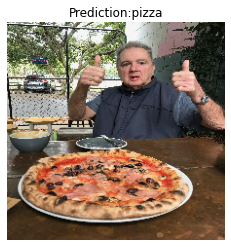

In [57]:
pred_and_plot(model=model_10,
              filename = "03-pizza-dad.jpeg",
              class_names=class_names)

[0.10396867 0.11426662 0.02103362 0.0759548  0.14113538 0.0562727
 0.0113221  0.1285004  0.32756257 0.01998314]


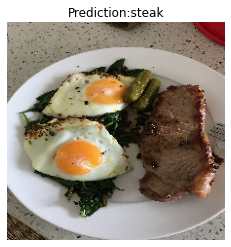

In [58]:
pred_and_plot(model=model_10,
              filename = "03-steak.jpeg",
              class_names=class_names)

[0.1642728  0.5245181  0.00864185 0.11859028 0.04734222 0.00306933
 0.06041657 0.0229796  0.03933792 0.01083129]


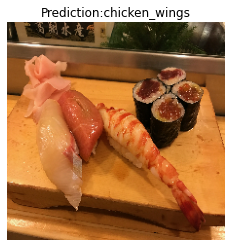

In [59]:
pred_and_plot(model=model_10,
              filename = "03-sushi.jpeg",
              class_names=class_names)

[0.06110329 0.04161411 0.08467765 0.03768877 0.16560704 0.10343796
 0.266138   0.08155829 0.06336381 0.09481107]


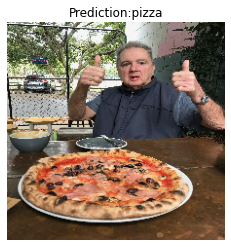

In [63]:
pred_and_plot(model=model_10,
              filename = "03-pizza-dad.jpeg",
              class_names=class_names)

#save and load model

In [64]:
model_10.save("saved_trained_model_10")  

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [68]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [69]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.6196 - accuracy: 0.4468


[1.6195555925369263, 0.44679999351501465]

In [70]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.6196 - accuracy: 0.4468


[1.6195557117462158, 0.44679999351501465]